In [ ]:
from  google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip -q /content/drive/MyDrive/DL-Dataset/SketchyScene-Yolo.zip

In [ ]:
!git clone https://github.com/ultralytics/yolov5.git

Cloning into 'yolov5'...
remote: Enumerating objects: 14786, done.
remote: Counting objects: 100% (117/117), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 14786 (delta 65), reused 90 (delta 46), pack-reused 14669
Receiving objects: 100% (14786/14786), 13.60 MiB | 33.57 MiB/s, done.
Resolving deltas: 100% (10202/10202), done.


In [ ]:
#!cp /content/yolov5/data/coco128.yaml /content/drive/MyDrive/DL-Dataset 
!cp /content/drive/MyDrive/DL-Dataset/coco128.yaml /content/yolov5/data/

In [ ]:
%cd yolov5/

/content/yolov5


In [ ]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 35.8 MB/s 


In [ ]:
%%shell
rm -rf /content/yolov5/runs/{train,val}/exp
python train.py --img 416 --batch 8 --epochs 100 --data coco128.yaml --weights yolov5x.pt --nosave --cache 

train: weights=yolov5x.pt, cfg=, data=coco128.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=8, imgsz=416, rect=False, resume=False, nosave=True, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.2-237-g55e9516 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, d

In [ ]:
!python val.py --weights /content/yolov5/runs/train/exp/weights/last.pt --data coco128.yaml --img 416 

val: data=/content/yolov5/data/coco128.yaml, weights=['/content/yolov5/runs/train/exp/weights/last.pt'], batch_size=32, imgsz=416, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v6.2-237-g55e9516 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 322 layers, 86267620 parameters, 0 gradients, 204.1 GFLOPs
val: Scanning '/content/SketchyScene-Yolo/test/labels.cache' images and labels... 15 found, 0 missing, 0 empty, 0 corrupt: 100% 15/15 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 1/1 [00:00<00:00,  1.08it/s]
                   all         15        176      0.891      0.515      0.648      0.417
              “Person”         15         16      0.871       0.7

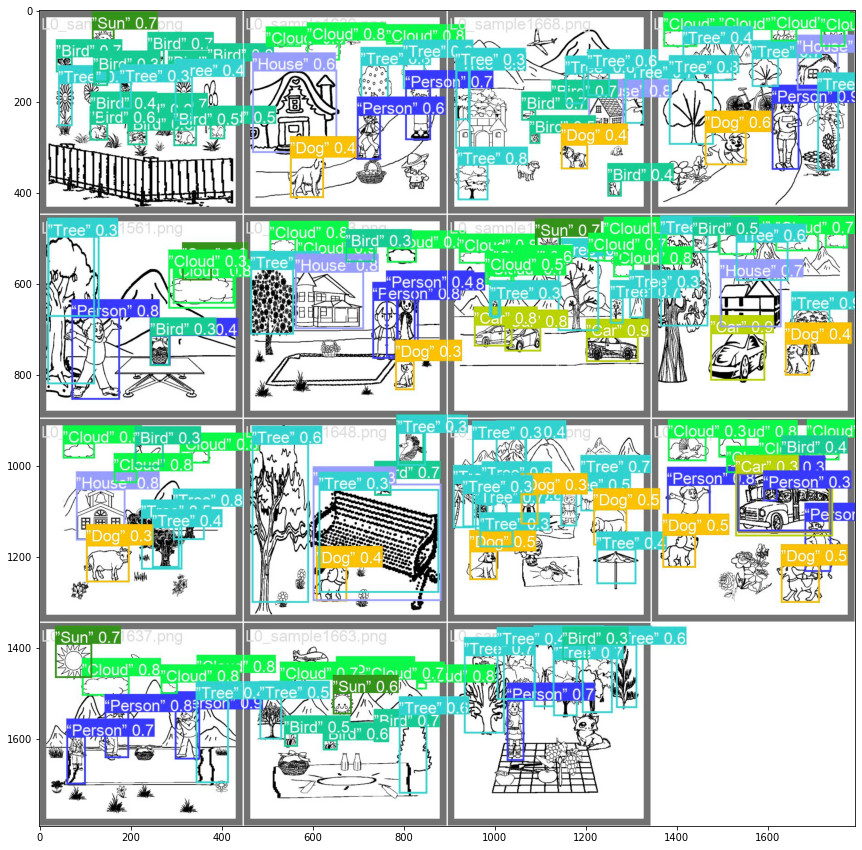

In [ ]:
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('/content/yolov5/runs/val/exp/val_batch0_pred.jpg')
plt.figure(figsize=(25, 15))
plt.imshow(img)

In [ ]:
!cp /content/yolov5/runs/train/exp/weights/last.pt /content/drive/MyDrive/DL-Dataset

In [ ]:
import torch
model = torch.hub.load('/content/yolov5', "custom", path='/content/yolov5/runs/train/exp/weights/last.pt',source='local')

YOLOv5 🚀 v6.2-237-g55e9516 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 322 layers, 86267620 parameters, 0 gradients, 204.1 GFLOPs
Adding AutoShape... 


In [ ]:
dir(model)

['T_destination',
 '__annotations__',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_apply',
 '_backward_hooks',
 '_buffers',
 '_call_impl',
 '_forward_hooks',
 '_forward_pre_hooks',
 '_get_backward_hooks',
 '_get_name',
 '_is_full_backward_hook',
 '_load_from_state_dict',
 '_load_state_dict_post_hooks',
 '_load_state_dict_pre_hooks',
 '_maybe_warn_non_full_backward_hook',
 '_modules',
 '_named_members',
 '_non_persistent_buffers_set',
 '_parameters',
 '_register_load_state_dict_pre_hook',
 '_register_state_dict_hook',
 '_replicate_for_data_parallel',
 '_save_to_state_dict',
 '_slow_forward',
 '_state_dict_hooks',
 '_ver

In [ ]:
res = model([cv2.imread('/content/SketchyScene-Yolo/test/images/L0_sample1561.png')])
res

YOLOv5 <class 'models.common.Detections'> instance
image 1/1: 750x750 1 “Person”, 1 ”Tree”
Speed: 4.7ms pre-process, 92.7ms inference, 1.4ms NMS per image at shape (1, 3, 640, 640)

In [ ]:
model([cv2.imread('/content/SketchyScene-Yolo/test/images/L0_sample1738.png')])

YOLOv5 <class 'models.common.Detections'> instance
image 1/1: 750x750 1 “Person”, 1 ”House”, 2 ”Tree”s, 3 ”Cloud”s, 1 ”Sun”, 1 ”Dog”
Speed: 4.5ms pre-process, 91.0ms inference, 1.8ms NMS per image at shape (1, 3, 640, 640)

In [ ]:
res.save()

Saved 1 image to runs/detect/exp


In [ ]:
li = res.pandas().xyxy[0].name.tolist()
li

['“Person”', '”Tree”']

In [ ]:
import os
img_list = []
directory = "/content/SketchyScene-Yolo/test/images"
for root, dirs, files in os.walk(directory):
    for filename in files:
        img_path = os.path.join(root, filename)
        img_list.append(cv2.imread(img_path))

In [ ]:
result = model(img_list)
result.save()

Saved 15 images to runs/detect/exp
